In [1]:
# Parameters
secretsPath = "/home/runner/work/_temp/secrets.json"
Start = "True"


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import dates
from IPython.display import display, Markdown
%matplotlib inline

Matplotlib is building the font cache; this may take a moment.


In [3]:
# This is the data for all of Wisconsin.
url = "https://opendata.arcgis.com/datasets/b913e9591eae4912b33dc5b4e88646c5_10.csv"
data = pd.read_csv(url, parse_dates=['DATE'], low_memory=False)

In [4]:
dc = data.groupby('NAME').get_group('Dunn').sort_values(by='DATE') # Select the data for Dunn County from the full data.
PNi = dc.columns.get_loc("POS_NEW")
dc['7_DAY'] = dc.iloc[:,PNi].rolling(window=7).mean() # Calculates the rolling 7-day average of new cases.

In [5]:
display(Markdown('### Last updated: ' + dc.iloc[-1]['DATE'].strftime("%B %d, %Y")))

### Last updated: September 01, 2020

In [6]:
display(Markdown('# Dunn County has ' + str(dc.iloc[-1]['POSITIVE']) + ' total positive cases.'))

# Dunn County has 179 total positive cases.

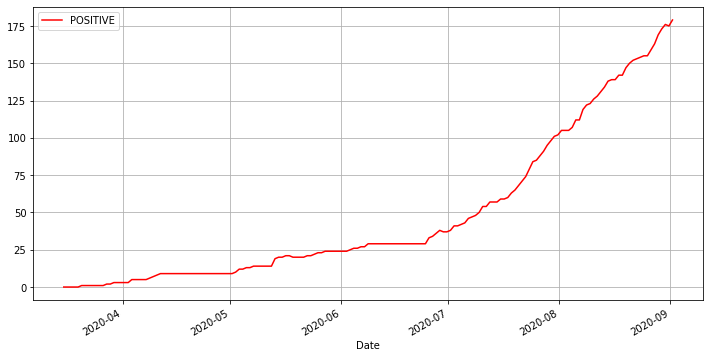

In [7]:
dc.plot(x='DATE',y='POSITIVE',color='red',grid='True',figsize=(12,6)).set_xlabel('Date');

## Figure 1: Cummulative number of positive cases.

In [8]:
display(Markdown('# Dunn County reported ' + str(dc.iloc[-1]['POS_NEW']) + ' new cases today.'))

# Dunn County reported 4.0 new cases today.

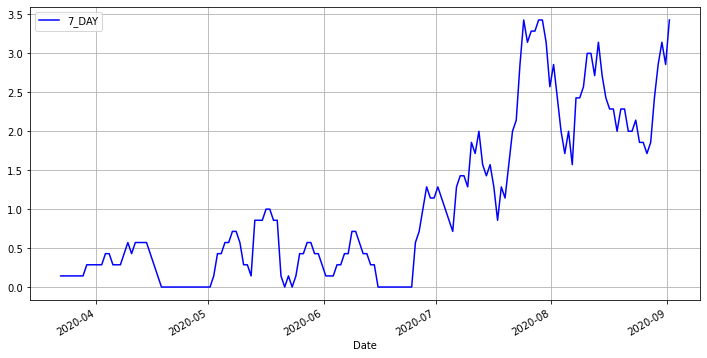

In [9]:
dc.plot(kind='line',x='DATE',y='7_DAY',color='blue',grid='True',figsize=(12,6)).set_xlabel('Date');

## Figure 2: Rolling 7-day average of daily new cases.

Data source: [Wisconsin Department of Health Services](https://data.dhsgis.wi.gov/datasets/covid-19-historical-data-table/)

In [10]:
%%html
<style>
div.input {
    display:none;
}
</style>